In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv')
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [2]:
df['label'] = df['Zone 1 Power Consumption'] > df['Zone 1 Power Consumption'].mean()
df['prediction'] = False
(df.label == df.prediction).sum() / len(df)
df['prediction'] = df.Temperature > df.Temperature.median()
(df.label == df['prediction']).sum() / len(df)


0.6372863247863247

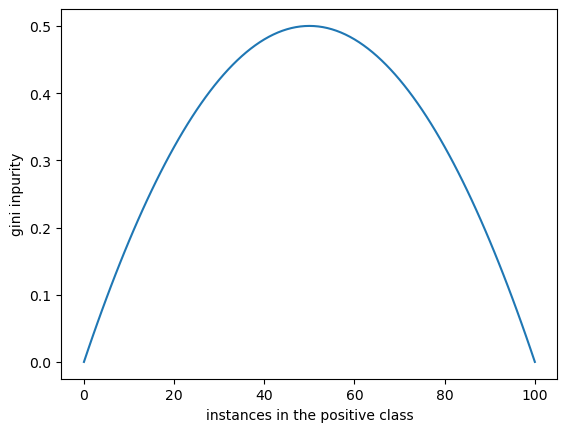

In [3]:
def gini(class1_count,class2_count):
    n = class1_count+class2_count
    return 2 * class1_count / n * class2_count / n

import matplotlib.pyplot as plt
import numpy as np

impurity = []
for c1 in range(101):
    c2 = 100 - c1
    impurity.append(gini(c1,c2))

plt.plot(range(101),impurity)
plt.xlabel('instances in the positive class')
plt.ylabel('gini inpurity')
plt.show()

In [4]:
c1 = (df.label == True).sum()
c2 = (df.label == False).sum()
gini(c1,c2)

0.49996759088627507

In [5]:
predict_high = df[df.Temperature > df.Temperature.median()]
predict_low = df[df.Temperature <= df.Temperature.median()]
pred_high_gini = gini((predict_high.label == True).sum(),(predict_high.label == False).sum())
pred_low_gini = gini((predict_low.label == True).sum(),(predict_low.label == False).sum())


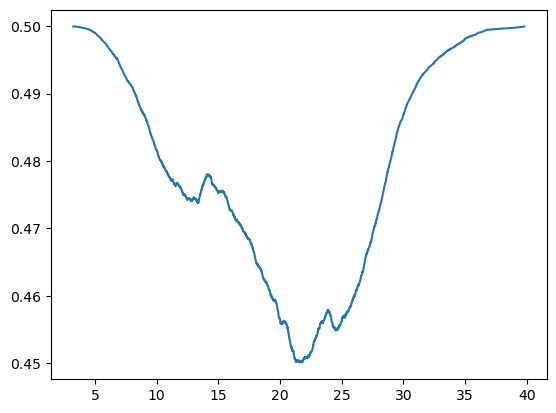

In [6]:
impurities = []
cutoffs = sorted(df.Temperature.unique())[:-1]
for cutoff in cutoffs:
    pred_high = df[df.Temperature > cutoff]
    pred_low = df[df.Temperature <= cutoff]
    pred_high_gini = gini((pred_high.label == True).sum(),(pred_high.label ==False).sum())
    pred_low_gini = gini((pred_low.label == True).sum(),(pred_low.label ==False).sum())
    avg_gini = (pred_high_gini * len(pred_high) + pred_low_gini * len(pred_low)) / (len(pred_high) + len(pred_low))
    impurities.append(avg_gini)

plt.plot(cutoffs, impurities)


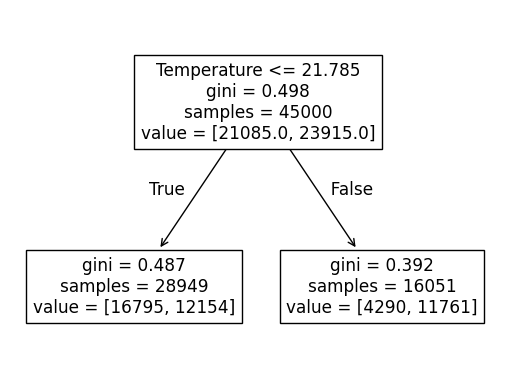

In [7]:
train_df = df.iloc[:45000]
test_df = df.iloc[45000:]
from sklearn import tree
model = tree.DecisionTreeClassifier(min_samples_leaf=15000)
features = ['Temperature']
train_X = train_df[features]

model.fit(train_X,train_df.label)
_ = tree.plot_tree(model,feature_names=features)

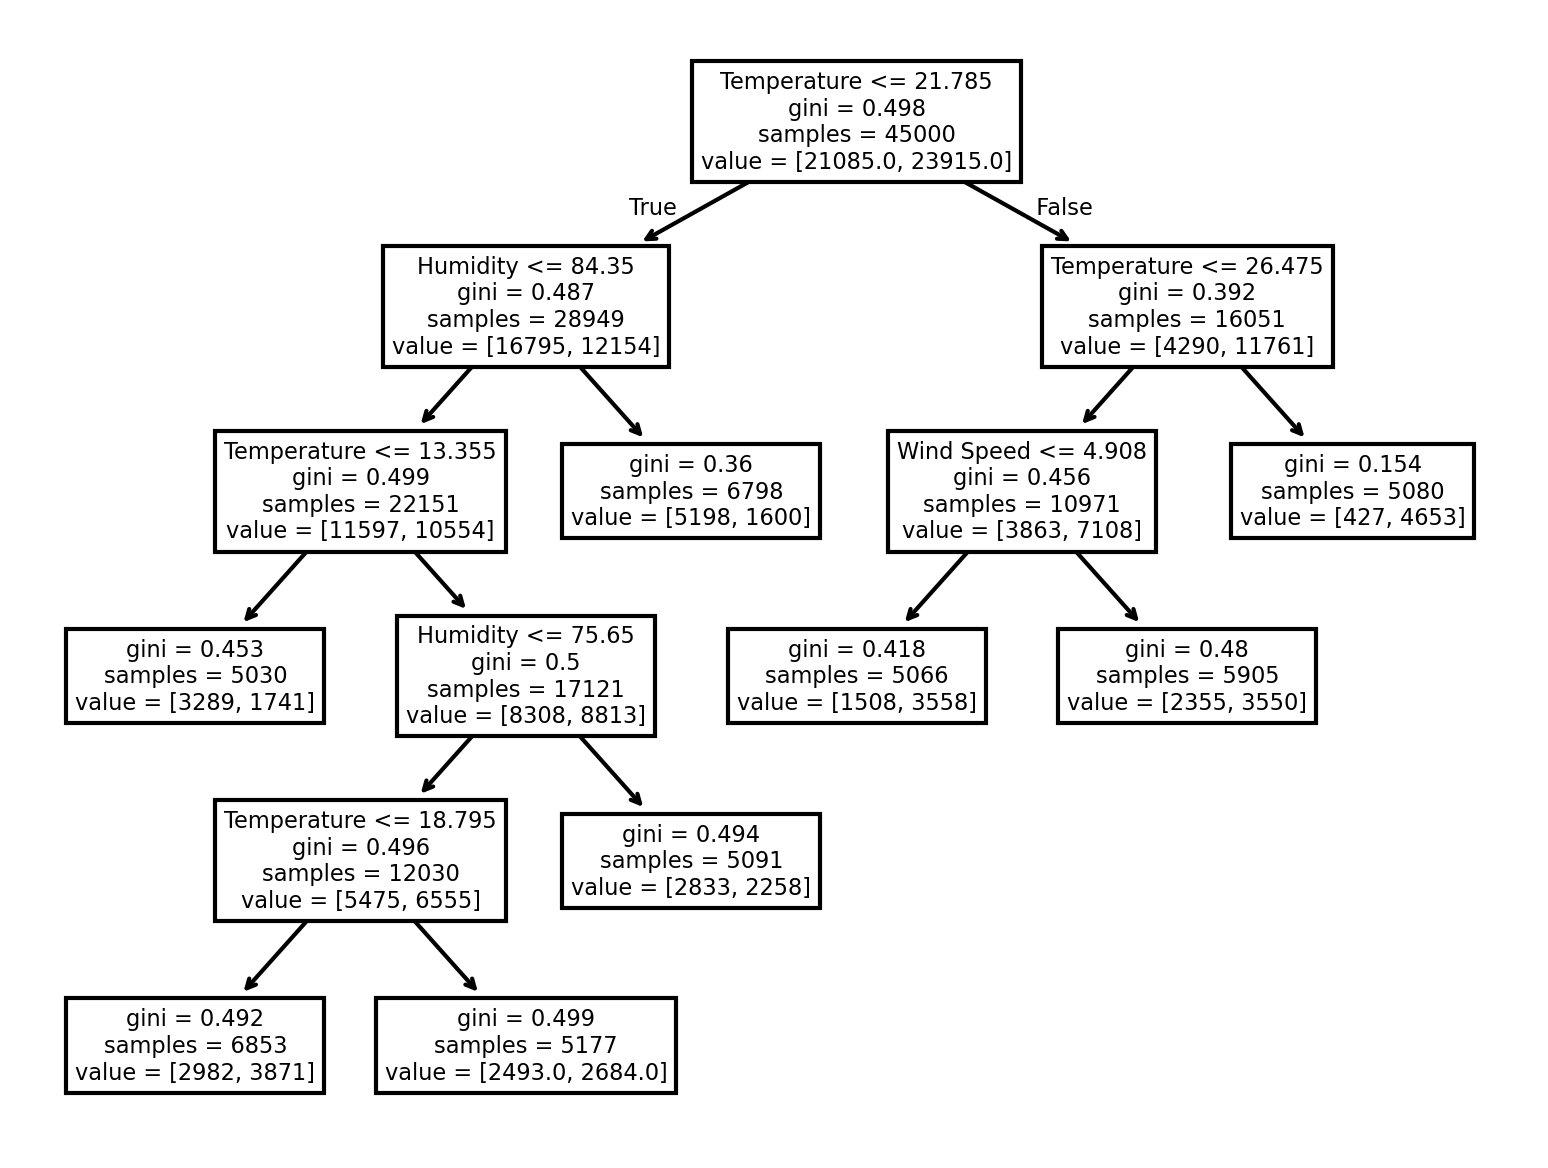

In [13]:
model = tree.DecisionTreeClassifier(min_samples_leaf = 5000) #smaller number = bigger tree
features = ['Temperature','Humidity','Wind Speed']
train_X = train_df[features]

model.fit(train_X, train_df.label)
plt.figure(dpi=300) #make the image high-resolution
_ = tree.plot_tree(model, feature_names=features)

In [21]:
from sklearn.metrics import cohen_kappa_score as kappa
test_X = test_df[features]
model = tree.DecisionTreeClassifier(min_samples_leaf=15000)
model.fit(train_X,train_df.label)
test_pred = model.predict(test_X)
train_pred = model.predict(train_X)

test_kappa = kappa(test_df.label, test_pred)
train_kappa = kappa(train_df.label, train_pred)
print(test_kappa,train_kappa)

0.023999655874861414 0.28209602813064394


Text(0, 0.5, 'humidity')

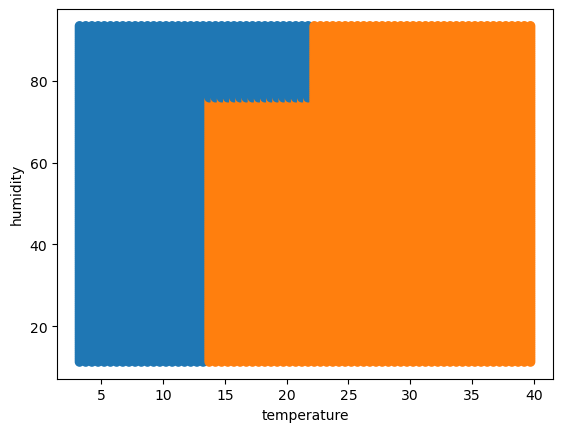

In [26]:
import numpy as np
model = tree.DecisionTreeClassifier(min_samples_leaf=5000)
features = ['Temperature','Humidity']
train_X = train_df[features]
model.fit(train_X, train_df.label)
temperatures = []
humidities = []
train_df.Temperature.describe()
train_df.Humidity.describe()

for t in np.arange(3.24,40,0.5):
    for h in np.arange(11.34,93.8,0.5):
        temperatures.append(t)
        humidities.append(h)

grid_df =pd.DataFrame({'Temperature':temperatures,'Humidity':humidities})

pred = model.predict(grid_df)
colors = []
for p in pred:
    colors.append('C'+str(int(p)))
plt.scatter(grid_df.Temperature, grid_df.Humidity, c=colors)
plt.xlabel('temperature')
plt.ylabel('humidity')